In [331]:
from sklearn.datasets import load_digits # The MNIST data set is in scikit learn data set
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
import numpy as np
import numpy.random as r # We will randomly initialize our weights
import matplotlib.pyplot as plt 
from math import exp

In [332]:
import csv
from numpy import genfromtxt

## SVM dual hard margin

In [333]:
X = genfromtxt('X.csv', delimiter=',') # reading in the data matrix
y = genfromtxt('y.csv', delimiter=',') # reading in the labels

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7,random_state=2)
print(f"{X_train.shape}. {y_train.shape}; {X_test.shape}, {y_test.shape}")

(30, 2). (30,); (70, 2), (70,)


In [335]:
from cvxopt import matrix, solvers

In [336]:
def kernel_svm(X, y):
    N = len(y)
    alphas = []
    y = y.reshape(-1, 1)
    yX = y * X
    P = matrix(yX.dot(yX.T))
    q = matrix((-1) * np.ones(X.shape[0]).reshape((X.shape[0], 1)))
    G = matrix((-1) * np.identity(X.shape[0]))
    h = matrix(np.zeros(X.shape[0]))
    A = matrix(y.reshape(1,-1))
    A = matrix(A, (1, X.shape[0]), 'd')
    b = matrix(np.zeros(1))
    sol = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(sol['x']).flatten()
    return alphas
alphas = kernel_svm(X_train, y_train)

     pcost       dcost       gap    pres   dres
 0: -2.7601e+00 -5.3406e+00  7e+01  7e+00  2e+00
 1: -4.0598e+00 -3.0175e+00  1e+01  1e+00  3e-01
 2: -2.2566e+00 -2.3205e+00  1e+00  9e-02  2e-02
 3: -2.1323e+00 -2.1543e+00  5e-02  3e-03  7e-04
 4: -2.1411e+00 -2.1421e+00  1e-03  4e-05  9e-06
 5: -2.1414e+00 -2.1414e+00  1e-05  4e-07  9e-08
 6: -2.1414e+00 -2.1414e+00  1e-07  4e-09  9e-10
Optimal solution found.


In [337]:
def compute_classification_boundary(X, y, alpha):
    indices = [alphas > 1e-12]
    w = np.dot(X.T, alphas*y).reshape(-1,1)
    w0 = y[indices] - np.dot(X[indices], w)
    w0 = np.mean(w0)
    return w, w0

w, w0 = compute_classification_boundary(X_train, y_train, alphas)
print(f"{w0}")

-0.2158414145270886


In [338]:
support_vectors = []
for i in range(len(alphas)):
    if alphas[i] > 1e-12:
        support_vectors.append([X_train[i], y_train[i], i])
alpha_indices = [support_vectors[i][2] for i in range(len(support_vectors))]
def classify_num(x):
    res = 0
    for i in range(len(support_vectors)):
        res += alphas[alpha_indices[i]]*y_train[alpha_indices[i]]*K(X_train[alpha_indices[i]],x)
    if (res >= 0):
        return 1
    else:
        return -1

In [339]:
pred = []
for i in range(len(X_test)):
    pred.append(classify_num(X_test[i]))
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, pred) * 100))

Prediction accuracy is 100.0%


## SVM dual soft margin

In [340]:
def kernel_svm_soft(X, y, C):
    N = len(y)
    alphas = []
    y = y.reshape(-1, 1)
    yX = y * X
    
    P = matrix(yX.dot(yX.T))
    q = matrix((-1) * np.ones(X.shape[0]).reshape((X.shape[0], 1)))

    G = matrix(np.vstack((-1 * np.diag(np.ones(X.shape[0])), np.identity(X.shape[0]))))
    h = matrix(np.hstack((np.zeros(X.shape[0]), np.ones(X.shape[0])*C)))

    A = matrix(y.reshape(1,-1))
    A = matrix(A, (1, X.shape[0]), 'd')
    b = matrix(np.zeros(1))
    sol = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(sol['x']).flatten()
    return alphas
alphas = kernel_svm_soft(X_train, y_train, 0.001)

     pcost       dcost       gap    pres   dres
 0: -1.4850e+00 -2.3817e-01  1e+02  1e+01  9e-16
 1: -2.3680e-01 -2.1714e-01  3e+00  3e-01  6e-16
 2: -7.9986e-02 -6.6523e-02  3e-01  2e-02  5e-16
 3: -2.5200e-02 -5.2027e-02  3e-02  1e-04  1e-15
 4: -2.5283e-02 -2.6046e-02  8e-04  3e-06  4e-16
 5: -2.5315e-02 -2.5556e-02  2e-04  8e-07  3e-16
 6: -2.5355e-02 -2.5420e-02  6e-05  1e-18  4e-16
 7: -2.5374e-02 -2.5382e-02  9e-06  1e-18  4e-16
 8: -2.5377e-02 -2.5378e-02  8e-07  1e-18  4e-16
 9: -2.5377e-02 -2.5377e-02  1e-08  1e-18  3e-16
Optimal solution found.


In [341]:
w, w0 = compute_classification_boundary(X_train, y_train, alphas)
print(f"{w0}")

0.12893779846545228


In [342]:
support_vectors = []
for i in range(len(alphas)):
    if alphas[i] > 1e-12:
        support_vectors.append([X_train[i], y_train[i], i])
alpha_indices = [support_vectors[i][2] for i in range(len(support_vectors))]
def classify_num(x):
    res = 0
    for i in range(len(support_vectors)):
        res += alphas[alpha_indices[i]]*y_train[alpha_indices[i]]*K(X_train[alpha_indices[i]],x)
    if (res >= 0):
        return 1
    else:
        return -1

In [343]:
pred = []
for i in range(len(X_test)):
    pred.append(classify_num(X_test[i]))
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, pred) * 100))

Prediction accuracy is 100.0%


# Dataset: DIGITS

## Data processing
since svm can only classify 2 categories of data, we only extract two categories from dataset

In [344]:
digits = load_digits()
X , y = digits.data, digits.target
X_scale = StandardScaler()
X = X_scale.fit_transform(X)

In [345]:
sub_X, sub_y = [], []
for i in range(len(X)):
    if y[i] == 2 or y[i] == 6:
        sub_X.append(X[i])
        sub_y.append(y[i])
sub_X = np.array(sub_X)
sub_y = np.array(sub_y)
X = sub_X
y = sub_y

2
6
2
6
2


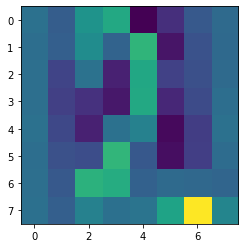

In [346]:
for i in range(5):
    plt.imshow(sub_X[i].reshape((8,8)))
    print(sub_y[i])

In [347]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2)
print(f"{X_train.shape}. {y_train.shape}; {X_test.shape}, {y_test.shape}")

(286, 64). (286,); (72, 64), (72,)


## SVM dual hard margin

In [348]:
from cvxopt import matrix, solvers

In [349]:
def kernel_svm(X, y):
    N = len(y)
    alphas = []
    y = y.reshape(-1, 1)
    yX = y * X
    P = matrix(yX.dot(yX.T))
    q = matrix((-1) * np.ones(X.shape[0]).reshape((X.shape[0], 1)))
    G = matrix((-1) * np.identity(X.shape[0]))
    h = matrix(np.zeros(X.shape[0]))
    A = matrix(y.reshape(1,-1))
    A = matrix(A, (1, X.shape[0]), 'd')
    b = matrix(np.zeros(1))
    sol = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(sol['x']).flatten()
    return alphas
alphas = kernel_svm(X_train, y_train)

     pcost       dcost       gap    pres   dres
 0: -1.9897e+00 -2.3931e+00  4e+02  2e+01  1e+00
 1: -1.9099e-02 -2.2917e-02  1e+01  7e-01  4e-02
 2: -3.8462e-03 -1.3463e-02  1e+00  5e-02  3e-03
 3: -1.7597e-03 -5.9704e-03  9e-02  4e-03  2e-04
 4: -1.0995e-03 -3.0818e-03  1e-02  6e-04  3e-05
 5: -1.1809e-03 -7.9689e-04  4e-03  2e-04  9e-06
 6: -2.4297e-04 -1.6856e-05  7e-04  3e-05  1e-06
 7: -3.3952e-06 -3.1347e-09  9e-06  3e-07  2e-08
 8: -3.3985e-08 -3.1352e-13  9e-08  3e-09  2e-10
Optimal solution found.


In [350]:
def compute_classification_boundary(X, y, alpha):
    indices = [alphas > 1e-12]
    w = np.dot(X.T, alphas*y).reshape(-1,1)
    w0 = y[indices] - np.dot(X[indices], w)
    w0 = np.mean(w0)
    return w, w0

w, w0 = compute_classification_boundary(X_train, y_train, alphas)
print(f"{w0}")

1.9999971510707548


In [351]:
def K(x1, x2):
    return np.dot(x1,x2)

In [352]:
support_vectors = []
for i in range(len(alphas)):
    if alphas[i] > 1e-12:
        support_vectors.append([X_train[i], y_train[i], i])
alpha_indices = [support_vectors[i][2] for i in range(len(support_vectors))]
def classify_num(x):
    res = 0
    for i in range(len(support_vectors)):
        res += alphas[alpha_indices[i]]*y_train[alpha_indices[i]]*K(X_train[alpha_indices[i]],x)
    if (res >= 0):
        return 2
    else:
        return 6

In [353]:
pred = []
for i in range(len(X_test)):
    pred.append(classify_num(X_test[i]))
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, pred) * 100))

Prediction accuracy is 87.5%


## SVM dual soft margin

In [354]:
def kernel_svm_soft(X, y, C):
    N = len(y)
    alphas = []
    y = y.reshape(-1, 1)
    yX = y * X
    
    P = matrix(yX.dot(yX.T))
    q = matrix((-1) * np.ones(X.shape[0]).reshape((X.shape[0], 1)))

    G = matrix(np.vstack((-1 * np.diag(np.ones(X.shape[0])), np.identity(X.shape[0]))))
    h = matrix(np.hstack((np.zeros(X.shape[0]), np.ones(X.shape[0])*C)))

    A = matrix(y.reshape(1,-1))
    A = matrix(A, (1, X.shape[0]), 'd')
    b = matrix(np.zeros(1))
    sol = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(sol['x']).flatten()
    return alphas
alphas = kernel_svm_soft(X_train, y_train, 0.001)

     pcost       dcost       gap    pres   dres
 0: -9.9832e-01 -3.2939e-01  7e+02  3e+01  1e-13
 1: -2.0125e-02 -3.2847e-01  1e+01  4e-01  2e-13
 2: -5.5310e-03 -2.9078e-01  7e-01  2e-02  7e-15
 3: -2.0631e-03 -9.1451e-02  1e-01  2e-03  1e-15
 4: -1.3863e-03 -2.6888e-02  3e-02  6e-04  1e-15
 5: -8.7897e-04 -7.3657e-03  1e-02  1e-04  1e-15
 6: -6.3265e-05 -6.1791e-04  8e-04  1e-05  2e-15
 7: -6.6491e-07 -6.3231e-06  9e-06  1e-07  2e-15
 8: -6.6503e-09 -6.3230e-08  9e-08  1e-09  1e-15
Optimal solution found.


In [355]:
w, w0 = compute_classification_boundary(X_train, y_train, alphas)
print(f"{w0}")

1.9999994268465084


In [356]:
support_vectors = []
for i in range(len(alphas)):
    if alphas[i] > 1e-12:
        support_vectors.append([X_train[i], y_train[i], i])
alpha_indices = [support_vectors[i][2] for i in range(len(support_vectors))]
def classify_num(x):
    res = 0
    for i in range(len(support_vectors)):
        res += alphas[alpha_indices[i]]*y_train[alpha_indices[i]]*K(X_train[alpha_indices[i]],x)
    if (res >= 0):
        return 2
    else:
        return 6

In [357]:
pred = []
for i in range(len(X_test)):
    pred.append(classify_num(X_test[i]))
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, pred) * 100))

Prediction accuracy is 90.27777777777779%
